In [1]:
import os
import mne
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [2]:
print('MNE–Python version', mne.__version__)

MNE–Python version 1.7.1


# Test on single participant, single task, single run

### define inputs

In [32]:
sub_label = '12'
task_label = 'active'
run_label = '1'

In [33]:

data_dir = os.path.join('/Users/dsj3886/data_local/EAM1',
                        #'EEG_raw'
                        )

bdf_path = os.path.join(data_dir,
                        f'sub-{sub_label}_task-{task_label}_run-{run_label}.bdf')
print(bdf_path)
#out_dir = []


/Users/dsj3886/data_local/EAM1/sub-12_task-active_run-1.bdf


### load EEG data

In [34]:
data = mne.io.read_raw_bdf(bdf_path, preload=True)

Extracting EDF parameters from /Users/dsj3886/data_local/EAM1/sub-12_task-active_run-1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 17825791  =      0.000 ...  1088.000 secs...


In [35]:
print(data.info)

<Info | 8 non-empty values
 bads: []
 ch_names: M1, M2, Cz, Erg1, Status
 chs: 4 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 3334.0 Hz
 meas_date: 2024-11-06 17:16:48 UTC
 nchan: 5
 projs: []
 sfreq: 16384.0 Hz
 subject_info: 1 item (dict)
>


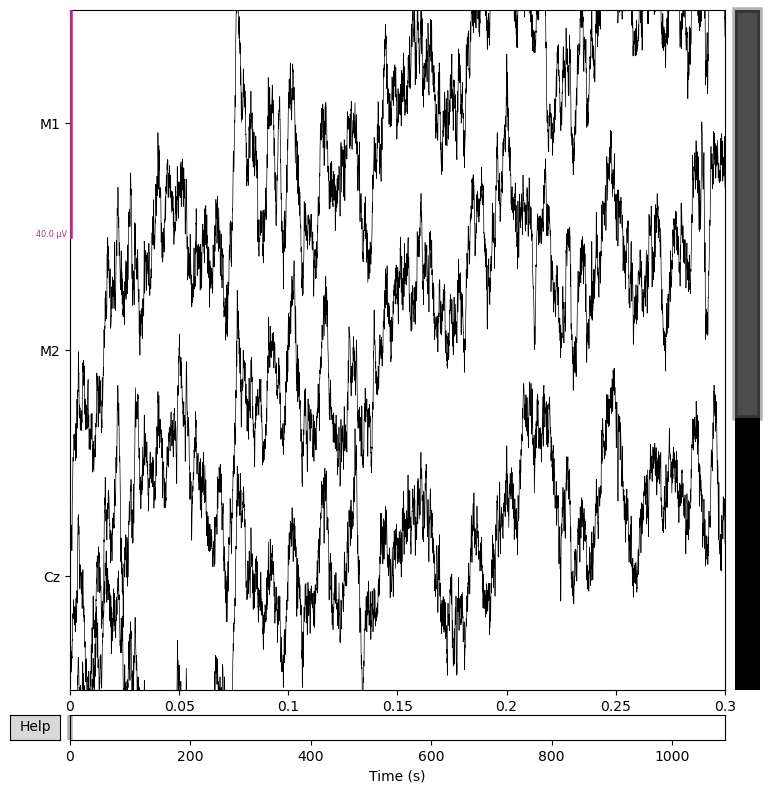

In [36]:
data.plot(duration=0.3, 
          n_channels=3,
          remove_dc=True);

### set reference channels

In [37]:
data_ref = data.set_eeg_reference(ref_channels=['M1', 'M2'])

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


In [38]:
print(data_ref.info)

<Info | 9 non-empty values
 bads: []
 ch_names: M1, M2, Cz, Erg1, Status
 chs: 4 EEG, 1 Stimulus
 custom_ref_applied: True
 highpass: 0.0 Hz
 lowpass: 3334.0 Hz
 meas_date: 2024-11-06 17:16:48 UTC
 nchan: 5
 projs: []
 sfreq: 16384.0 Hz
 subject_info: 1 item (dict)
>


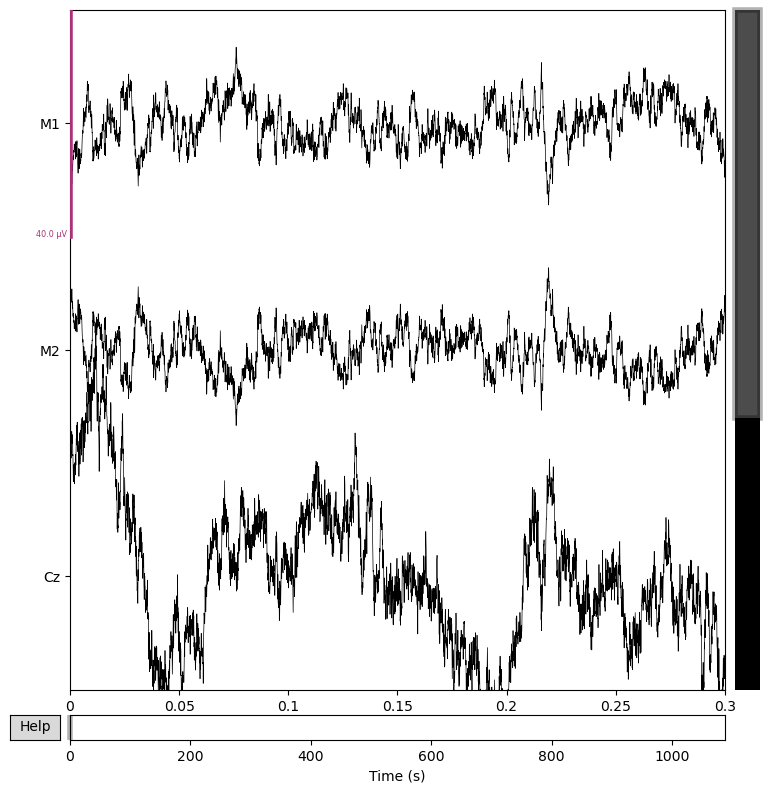

In [39]:
data_ref.plot(duration=0.3, 
              n_channels=3, 
              remove_dc=True);

### filter data

In [40]:
data_filtered = data_ref.copy().filter(l_freq = 70, h_freq = 2000)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 70 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 70.00
- Lower transition bandwidth: 17.50 Hz (-6 dB cutoff frequency: 61.25 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3091 samples (0.189 s)



In [41]:
data_filtered

Measurement date,"November 06, 2024 17:16:48 GMT"
Experimenter,Unknown
Participant,
Digitized points,Not available
Good channels,"4 EEG, 1 Stimulus"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,16384.00 Hz
Highpass,70.00 Hz
Lowpass,2000.00 Hz


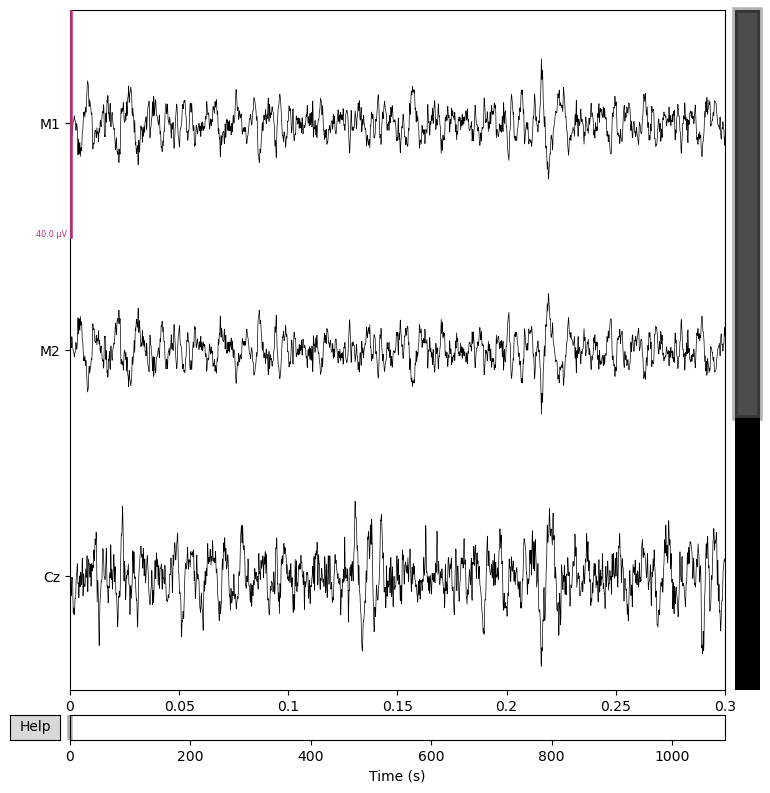

In [42]:
data_filtered.plot(duration=0.3, 
                   n_channels=3, 
                   remove_dc=True);

### Find events in the trigger channel

In [43]:
events = mne.find_events(data_filtered, 
                         stim_channel='Status', 
                         initial_event=True)

3601 events found on stim channel Status
Event IDs: [    1     2     7    10   130 65536]


In [44]:
# unique_events, unique_indices, unique_inverse, count_events = 
unique, counts = np.unique(events[:,2], return_counts=True)
print(unique)
print(counts)


[    1     2     7    10   130 65536]
[ 600  599 1200 1200    1    1]


In [45]:
for tx, trigger in enumerate(unique):
    print(f'trigger code {trigger} – {counts[tx]} events')

trigger code 1 – 600 events
trigger code 2 – 599 events
trigger code 7 – 1200 events
trigger code 10 – 1200 events
trigger code 130 – 1 events
trigger code 65536 – 1 events


In [46]:
event_dict = {'pol_pos': 1, #2049,
              'pol_neg': 2, #2050,
              'button_1': 7, #6144,
              #'button_2': 6145,
              #'button_3': 6149,
              }

/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_53924/2210850885.py:1: RuntimeWarning: event 10 missing from event_id will be ignored
  fig = mne.viz.plot_events(
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_53924/2210850885.py:1: RuntimeWarning: event 65536 missing from event_id will be ignored
  fig = mne.viz.plot_events(


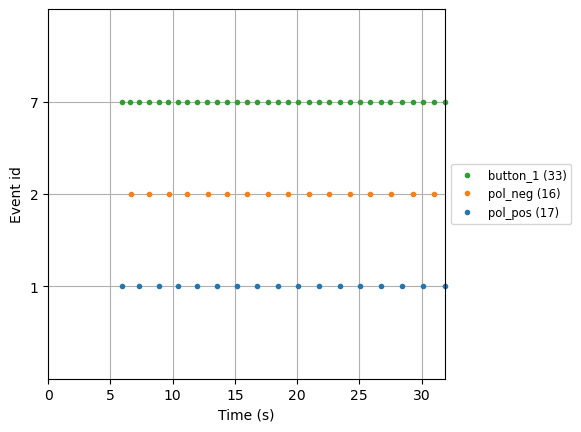

In [47]:
fig = mne.viz.plot_events(
            events[:100], event_id=event_dict, 
            sfreq=data_filtered.info["sfreq"], 
            first_samp=data_filtered.first_samp
)

### Epoch the data based on events

In [48]:
epochs = mne.Epochs(data_filtered, 
                    events, 
                    event_id=event_dict,
                    picks=['Cz'],
                    tmin=-0.04, tmax=0.3, 
                    baseline=[-0.04, 0],
                    reject=dict(eeg=75e-6)).drop_bad()


Not setting metadata
2399 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 2399 events and 5571 original time points ...
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based

In [49]:
print(epochs.info)

<Info | 9 non-empty values
 bads: []
 ch_names: Cz
 chs: 1 EEG
 custom_ref_applied: True
 highpass: 70.0 Hz
 lowpass: 2000.0 Hz
 meas_date: 2024-11-06 17:16:48 UTC
 nchan: 1
 projs: []
 sfreq: 16384.0 Hz
 subject_info: 1 item (dict)
>


You seem to have overlapping epochs. Some event lines may be duplicated in the plot.
Using data from preloaded Raw for 5 events and 5571 original time points ...


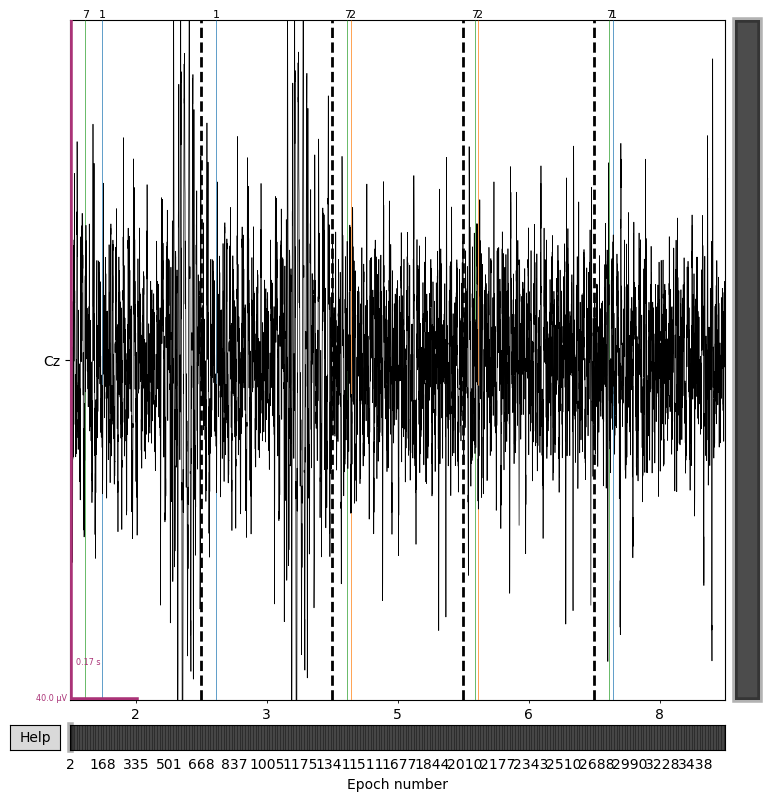

In [50]:
# plot the first few epochs
epochs.plot(n_epochs = 5, 
            events=True);

In [97]:
# save epoched data to a new file
epochs.save(f'sub-{sub_label}_task-{task_label}_run-{run_label}_epochs.fif', overwrite = True)

Using data from preloaded Raw for 1 events and 5571 original time points ...
Using data from preloaded Raw for 2210 events and 5571 original time points ...


/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_28520/1753865263.py:2: RuntimeWarning: This filename (sub-12_task-active_run-1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs.save(f'sub-{sub_label}_task-{task_label}_run-{run_label}_epochs.fif', overwrite = True)


In [51]:
'''%matplotlib
#plot erg channel with triggers
#define start
t1start = (events[1,0])/data_filtered.info['sfreq']
tend = events[8,0]/(data_filtered.info['sfreq'])#*5*60) #right now this plots the first 9 epochs
data_filtered.plot(
    events=events,
    start=t1start,
    duration=tend,
    color="gray",
    picks='Erg1'
)
'''

'%matplotlib\n#plot erg channel with triggers\n#define start\nt1start = (events[1,0])/data_filtered.info[\'sfreq\']\ntend = events[8,0]/(data_filtered.info[\'sfreq\'])#*5*60) #right now this plots the first 9 epochs\ndata_filtered.plot(\n    events=events,\n    start=t1start,\n    duration=tend,\n    color="gray",\n    picks=\'Erg1\'\n)\n'

### Created `Evoked` from `Epochs`

In [52]:
evoked = epochs.average(by_event_type=True)

In [53]:
evoked

[<Evoked | 'pol_pos' (average, N=555), -0.039978 – 0.29999 s, baseline -0.04 – 0 s, 1 ch, ~50 kB>,
 <Evoked | 'pol_neg' (average, N=549), -0.039978 – 0.29999 s, baseline -0.04 – 0 s, 1 ch, ~50 kB>,
 <Evoked | 'button_1' (average, N=1106), -0.039978 – 0.29999 s, baseline -0.04 – 0 s, 1 ch, ~50 kB>]

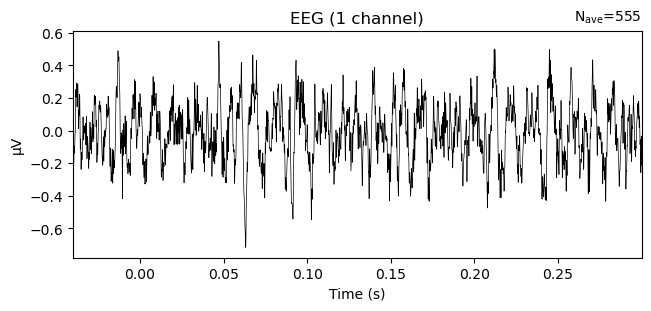

In [54]:
evoked[0].plot(selectable=False);

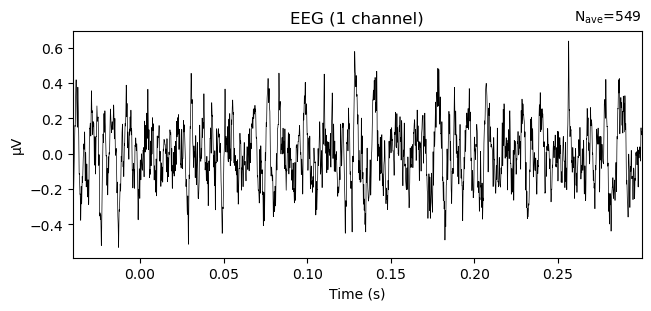

In [55]:
evoked[1].plot(selectable=False);

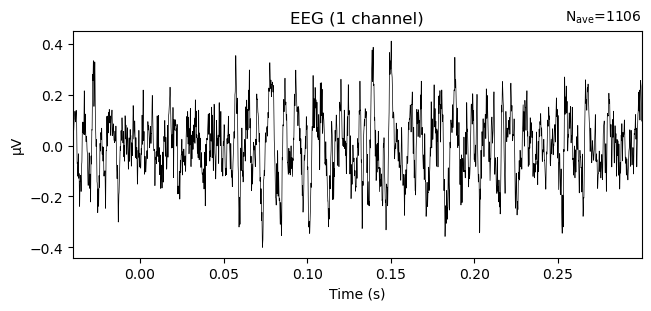

In [56]:
evoked[2].plot(selectable=False);

    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/Users/dsj3886/miniconda3/envs/py23/lib/python3.11/site-packages/mne/viz/utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


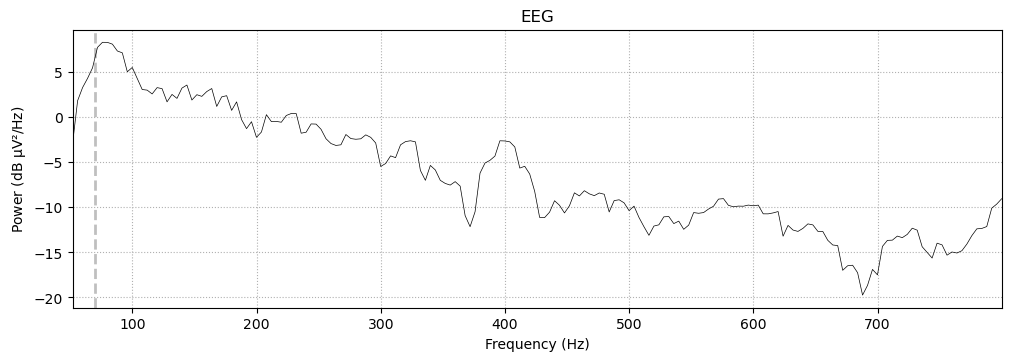

In [57]:
evoked_psd = evoked[0].compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)
evoked_psd.plot(average=True, amplitude=False)

    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/Users/dsj3886/miniconda3/envs/py23/lib/python3.11/site-packages/mne/viz/utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


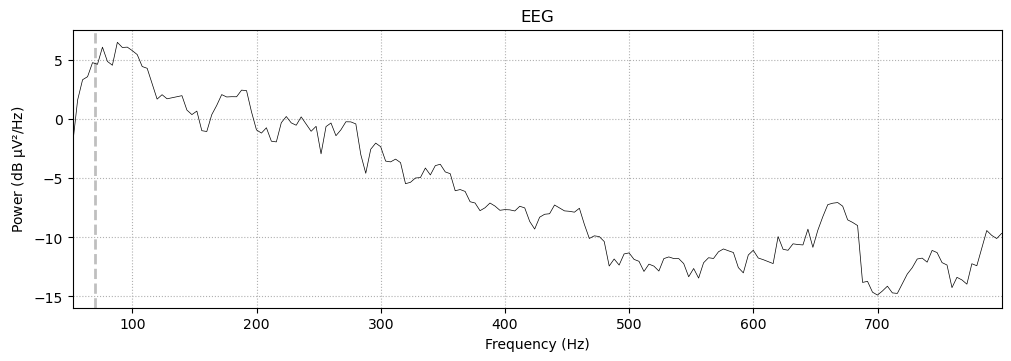

In [58]:
evoked_psd = evoked[1].compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)
evoked_psd.plot(average=True, amplitude=False)

    Using multitaper spectrum estimation with 7 DPSS windows


Plotting power spectral density (dB=True).


/Users/dsj3886/miniconda3/envs/py23/lib/python3.11/site-packages/mne/viz/utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


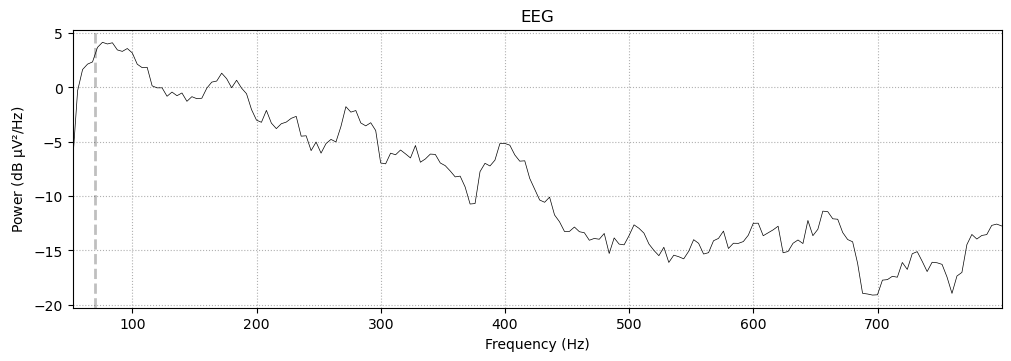

In [59]:
evoked_psd = evoked[2].compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)
evoked_psd.plot(average=True, amplitude=False)

No baseline correction applied


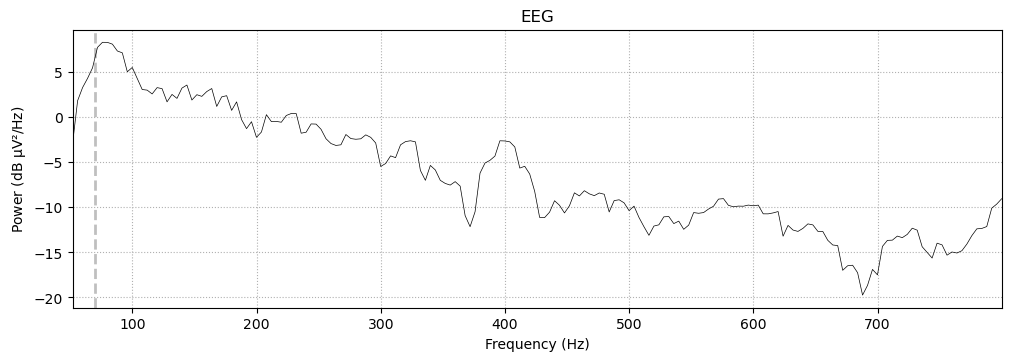

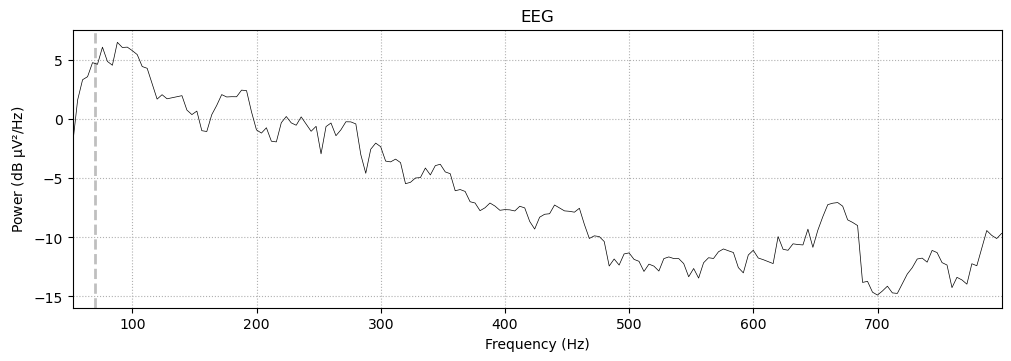

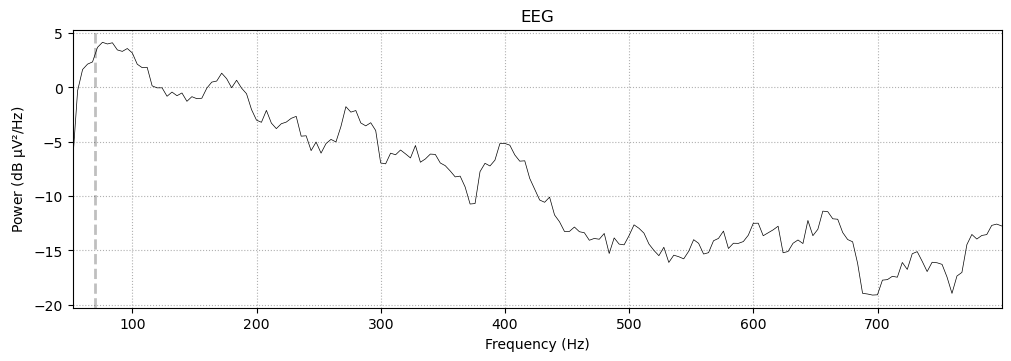

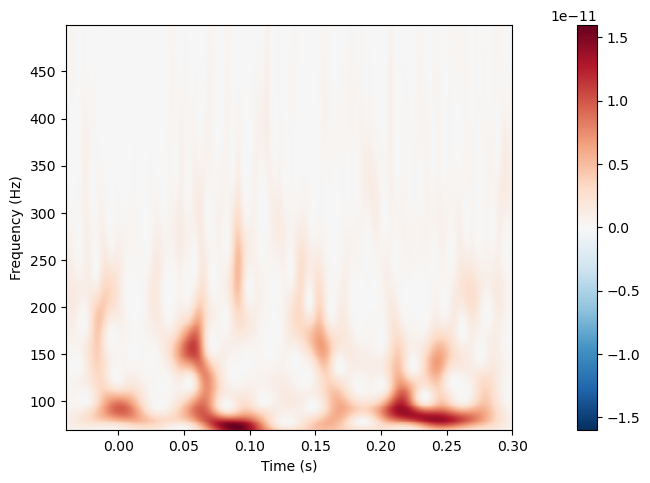

[<Figure size 640x480 with 2 Axes>]

In [60]:
frequencies = np.arange(70,500)
power = evoked[0].compute_tfr("morlet", freqs=frequencies)
power.plot()

No baseline correction applied


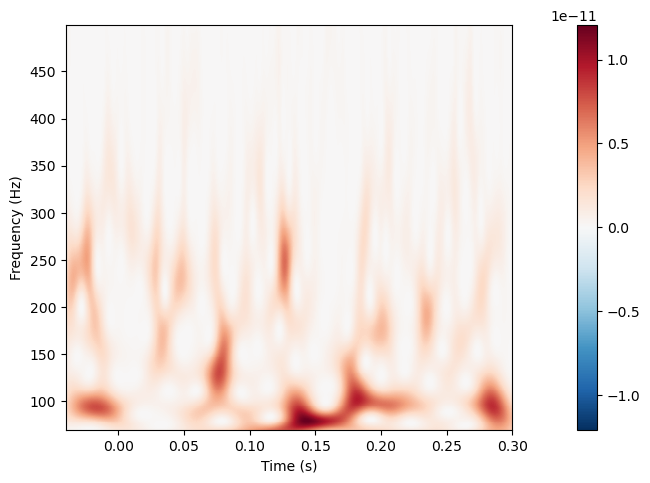

[<Figure size 640x480 with 2 Axes>]

In [61]:
frequencies = np.arange(70,500)
power = evoked[1].compute_tfr("morlet", freqs=frequencies)
power.plot()

No baseline correction applied


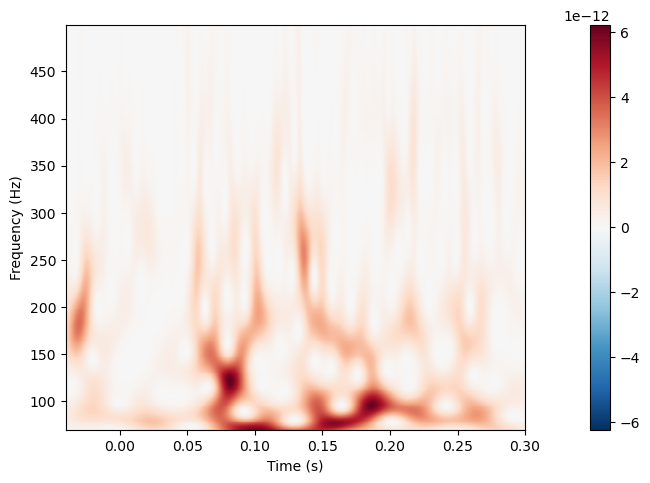

[<Figure size 640x480 with 2 Axes>]

In [62]:
frequencies = np.arange(70,500)
power = evoked[2].compute_tfr("morlet", freqs=frequencies)
power.plot()

# Combine multiple runs

In [46]:
sub_label = '12'
task_list = ['active', 'passive', 'motor']

data_dir = os.path.join('/Users/dsj3886/data_local/EAM1/',
                        #'EEG_raw'
                        )

In [47]:
# define events of interest based on trigger code
event_dict = {'sound/pos': 2049,
                'sound/neg': 2050,
                'button_press/1': 6144,
                'button_press/2': 10240,
                'button_press/3': 18432,
                'button_press/4': 34816,
                }

In [48]:
# initialize an empty dictionary for data
task_evoked_dict = {}
event_evoked_dict = {}

for task_label in task_list:
    print(f'Loading {task_label} data')

    bdf_list = sorted(glob(data_dir + f'/sub-{sub_label}*{task_label}*bdf'))
    print(f'task-{task_label} bdf files:', bdf_list)

    epoch_list = []

    ''' # COMBINED AND MOVED UP OUTSIDE THIS LOOP
    if task_label == 'motor':
        event_dict = {'button_press/1': 6144,
                        'button_press/2': 10240,
                        'button_press/3': 18432,
                        'button_press/4': 34816}
    if task_label == 'active':
        event_dict = {'sound/pos': 2049,
                        'sound/neg': 2050,
                        'button_press/1': 6144,
                        'button_press/2': 10240,
                        'button_press/3': 18432,
                        'button_press/4': 34816,
                        }
    elif task_label == 'passive'::
        event_dict = {'sound/pos': 2049,
                        'sound/neg': 2050}
    '''

    for rx, bdf_path in enumerate(bdf_list):
        print(f'Loading task-{task_label} run-{rx+1}')

        # load in EEG data
        data = mne.io.read_raw_bdf(bdf_path, preload=True)
        
        #try:

        # re-reference data to linked mastoid reference
        data_ref = data.set_eeg_reference(ref_channels=['M1', 'M2'])
        
        # filter data
        data_filtered = data_ref.copy().filter(l_freq=70, h_freq=2000)
        
        # find events
        events = mne.find_events(data_filtered, 
                                 stim_channel='Status', 
                                 initial_event=True)
        
        # epoch data based on stimulus events
        epochs = mne.Epochs(data_filtered, 
                            events, 
                            event_id=event_dict,
                            on_missing='warn',
                            picks=['Cz'],
                            tmin=-0.04, tmax=0.3, 
                            baseline=[-0.04, 0],
                            reject=dict(eeg=75e-6)).drop_bad()
        
        epoch_list.append(epochs)

        #except:
        #    print(f"No run {run_label} for task-{task_label}")
    
    # combine epochs across runs
    all_epochs = mne.concatenate_epochs(epoch_list)
    epochs.save(f'sub-{sub_label}_task-{task_label}_run-all_epochs.fif', overwrite=True)
    
    # create evoked average from across-run epochs
    event_evoked = all_epochs.average(by_event_type=True)
    all_evoked = all_epochs.average()

    # add to results dict
    event_evoked_dict[task_label] = event_evoked
    task_evoked_dict[task_label] = all_evoked



Loading active data
task-active bdf files: ['/Users/dsj3886/data_local/EAM1/sub-12_task-active_run-1.bdf']
Loading task-active run-1
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1/sub-12_task-active_run-1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 17825791  =      0.000 ...  1088.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 70 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 70.00
- Lower transition bandwidth: 17.50 Hz (-6 dB cutoff frequency: 61.25 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length

/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_28520/2994009793.py:52: RuntimeWarning: No matching events found for sound/pos (event id 2049)
  epochs = mne.Epochs(data_filtered,
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_28520/2994009793.py:52: RuntimeWarning: No matching events found for sound/neg (event id 2050)
  epochs = mne.Epochs(data_filtered,
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_28520/2994009793.py:52: RuntimeWarning: No matching events found for button_press/1 (event id 6144)
  epochs = mne.Epochs(data_filtered,
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_28520/2994009793.py:52: RuntimeWarning: No matching events found for button_press/2 (event id 10240)
  epochs = mne.Epochs(data_filtered,
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_28520/2994009793.py:52: RuntimeWarning: No matching events found for button_press/3 (event id 18432)
  epochs = mne.Epochs(data_filtered,
/var/folders/5g/l5zc58vs5y17

ValueError: max() arg is an empty sequence

### Plot individual polarities

In [15]:
event_evoked_dict

{'active': [<Evoked | 'sound/pos' (average, N=2196), -0.039978 – 0.29999 s, baseline -0.04 – 0 s, 1 ch, ~50 kB>,
  <Evoked | 'sound/neg' (average, N=4), -0.039978 – 0.29999 s, baseline -0.04 – 0 s, 1 ch, ~50 kB>,
  <Evoked | 'button_press/1' (average, N=2464), -0.039978 – 0.29999 s, baseline -0.04 – 0 s, 1 ch, ~50 kB>,
  <Evoked | 'button_press/2' (average, N=24), -0.039978 – 0.29999 s, baseline -0.04 – 0 s, 1 ch, ~50 kB>,
  <Evoked | 'button_press/3' (average, N=21), -0.039978 – 0.29999 s, baseline -0.04 – 0 s, 1 ch, ~50 kB>,
  <Evoked | 'button_press/4' (average, N=24), -0.039978 – 0.29999 s, baseline -0.04 – 0 s, 1 ch, ~50 kB>],
 'passive': [<Evoked | 'sound/pos' (average, N=1189), -0.039978 – 0.29999 s, baseline -0.04 – 0 s, 1 ch, ~50 kB>,
  <Evoked | 'sound/neg' (average, N=1189), -0.039978 – 0.29999 s, baseline -0.04 – 0 s, 1 ch, ~50 kB>,
  <Evoked | 'button_press/1' (average, N=0), -0.039978 – 0.29999 s, baseline -0.04 – 0 s, 1 ch, ~50 kB>,
  <Evoked | 'button_press/2' (average,

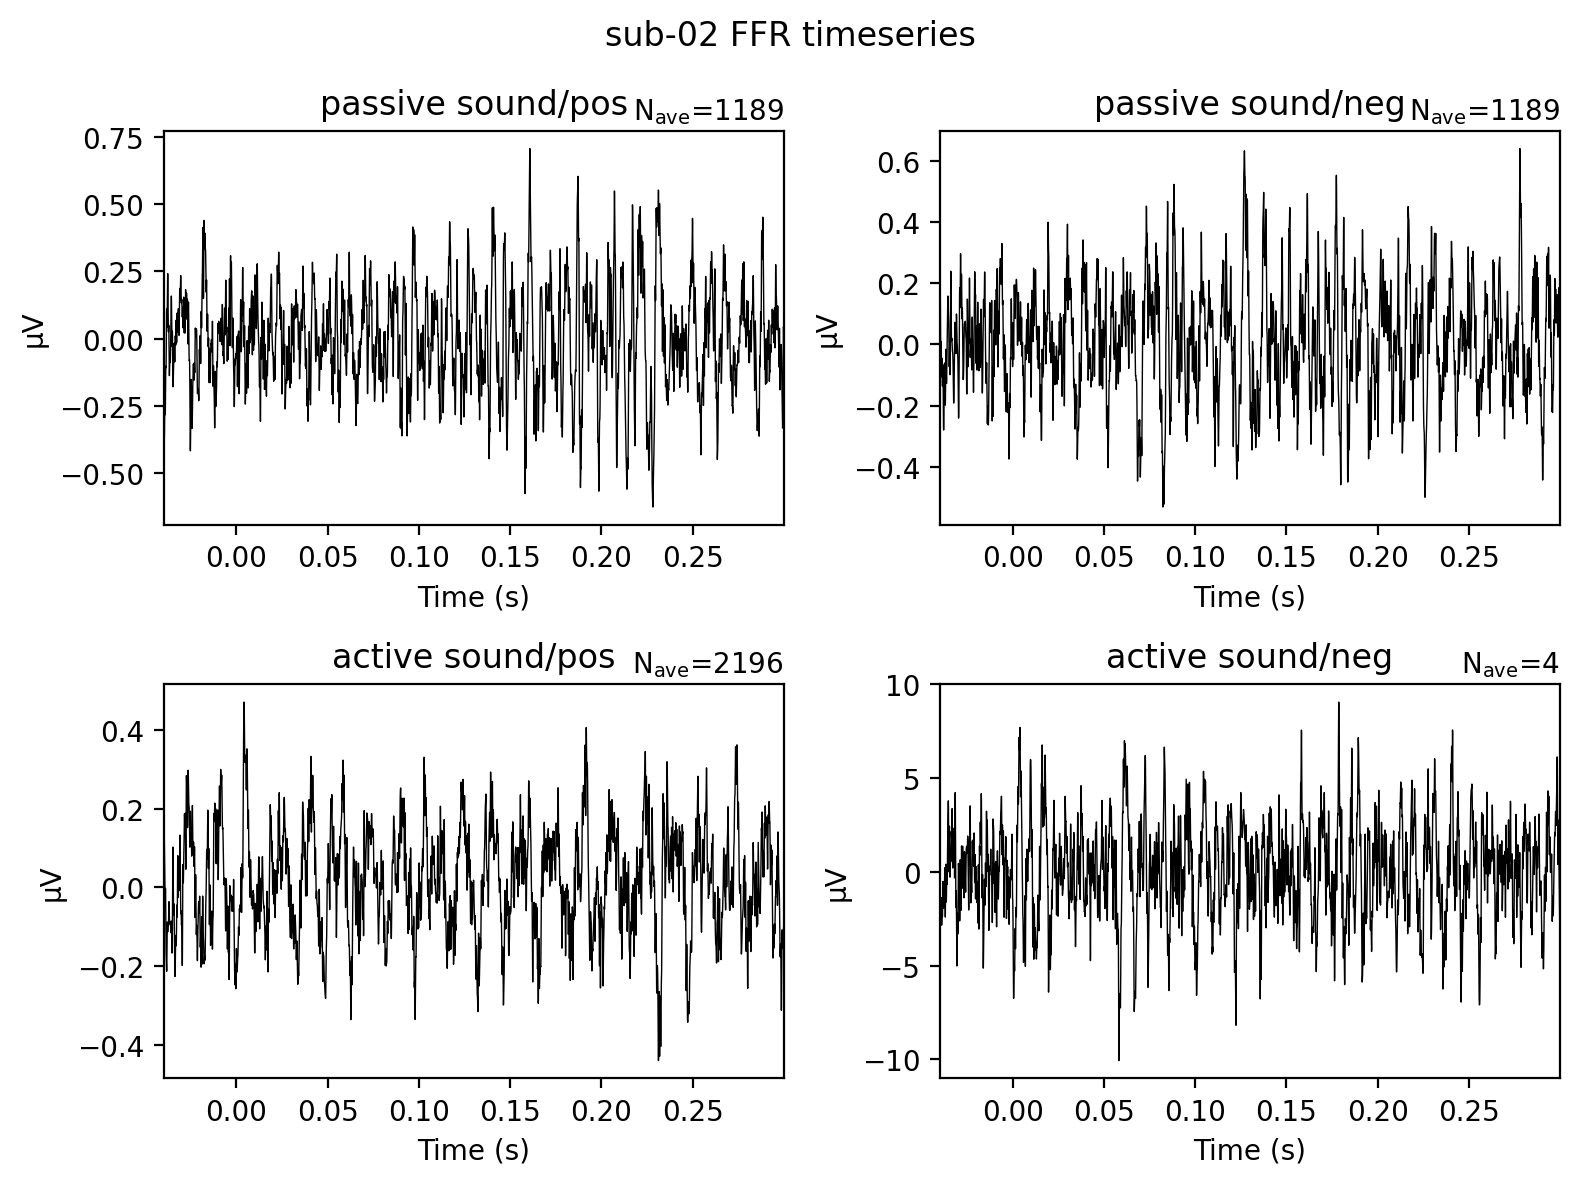

In [ ]:
# Waveforms
fig, axes = plt.subplots(2, 2, figsize=(8,6), dpi=200)
ax = axes.flatten()
event_evoked_dict['passive'][0].plot(axes=ax[0], selectable=False, show=False)
event_evoked_dict['passive'][1].plot(axes=ax[1], selectable=False, show=False)
event_evoked_dict['active'][0].plot(axes=ax[2], selectable=False, show=False)
event_evoked_dict['active'][1].plot(axes=ax[3], selectable=False, show=False)

ax[0].set_title('passive ' + event_evoked_dict['passive'][0].comment);
ax[1].set_title('passive ' + event_evoked_dict['passive'][1].comment);
ax[2].set_title('active ' + event_evoked_dict['active'][0].comment);
ax[3].set_title('active ' + event_evoked_dict['active'][1].comment);

fig.suptitle(f'sub-{sub_label} FFR timeseries')

fig.tight_layout()
plt.show()
#plt.savefig(f'sub-{sub_label}_polarity-single_timeseries.svg')

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).


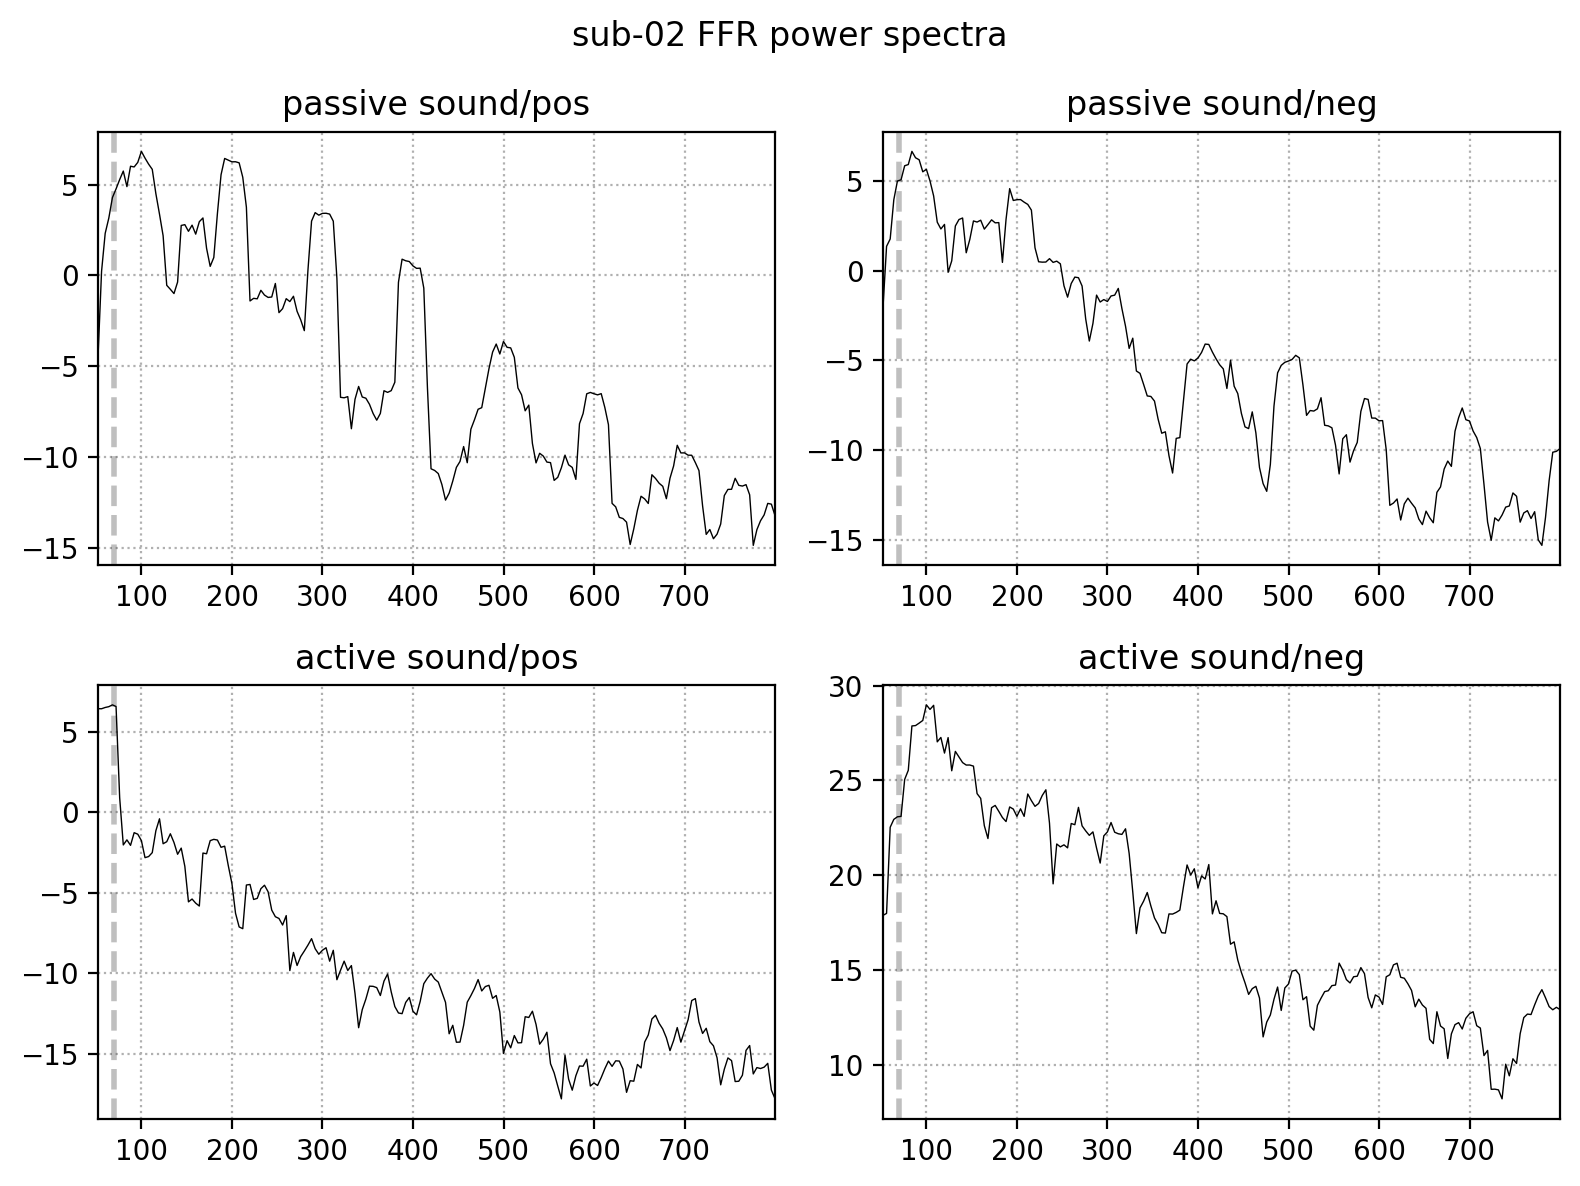

In [ ]:
# Power spectra
passive_pos_psd = event_evoked_dict['passive'][0].compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)
passive_neg_psd = event_evoked_dict['passive'][1].compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)
active_pos_psd = event_evoked_dict['active'][0].compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)
active_neg_psd = event_evoked_dict['active'][1].compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)

fig, axes = plt.subplots(2, 2, figsize=(8,6), dpi=200)
ax = axes.flatten()
passive_pos_psd.plot(axes=ax[0], amplitude=False, average=True, show=False)
passive_neg_psd.plot(axes=ax[1], amplitude=False, average=True, show=False)
active_pos_psd.plot(axes=ax[2], amplitude=False, average=True, show=False)
active_neg_psd.plot(axes=ax[3], amplitude=False, average=True, show=False)

ax[0].set_title('passive ' + event_evoked_dict['passive'][0].comment);
ax[1].set_title('passive ' + event_evoked_dict['passive'][1].comment);
ax[2].set_title('active ' + event_evoked_dict['active'][0].comment);
ax[3].set_title('active ' + event_evoked_dict['active'][1].comment);

fig.suptitle(f'sub-{sub_label} FFR power spectra')

fig.tight_layout()
plt.show()
#plt.savefig(f'sub-{sub_label}_polarity-single_spectra.svg')

No baseline correction applied
No baseline correction applied
No baseline correction applied
No baseline correction applied


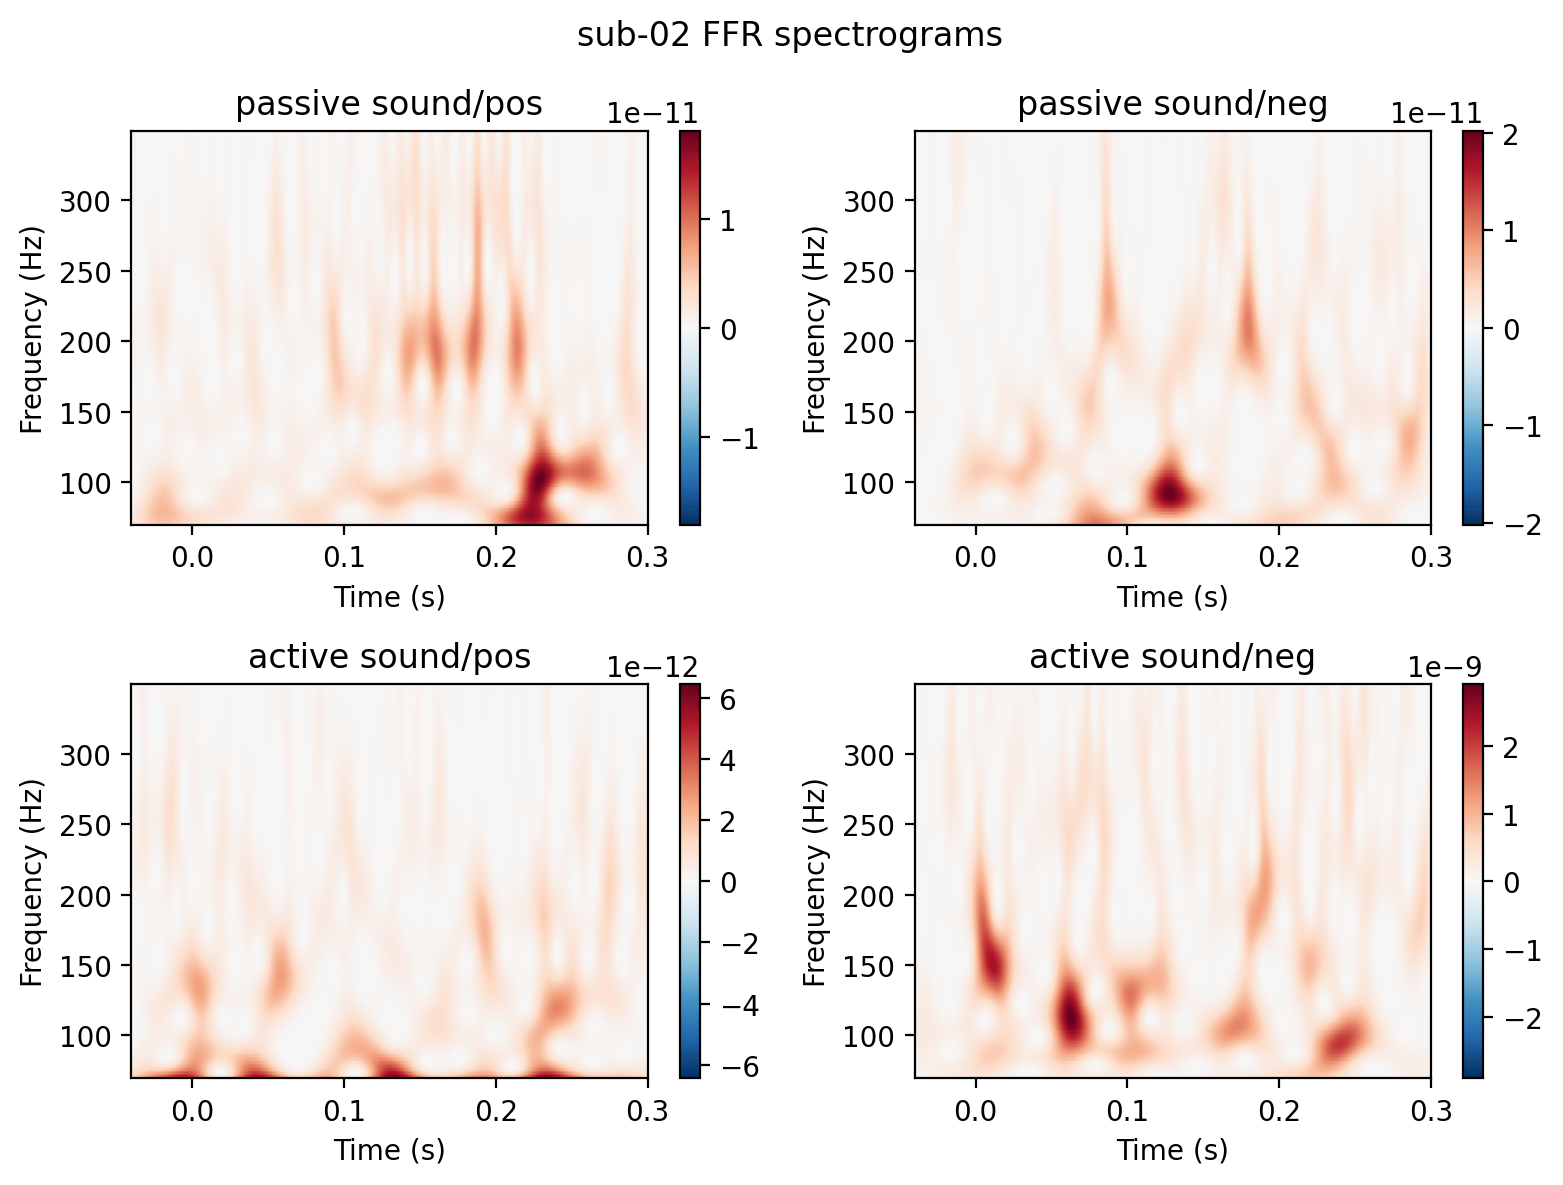

In [ ]:
# Spectrograms
frequencies = np.arange(70,350)

passive_pos_power = event_evoked_dict['passive'][0].compute_tfr("morlet", freqs=frequencies)
passive_neg_power = event_evoked_dict['passive'][1].compute_tfr("morlet", freqs=frequencies)
active_pos_power = event_evoked_dict['active'][0].compute_tfr("morlet", freqs=frequencies)
active_neg_power = event_evoked_dict['active'][1].compute_tfr("morlet", freqs=frequencies)

fig, axes = plt.subplots(2, 2, figsize=(8,6), dpi=200)
ax = axes.flatten()
passive_pos_power.plot(axes=ax[0], show=False)
passive_neg_power.plot(axes=ax[1], show=False)
active_pos_power.plot(axes=ax[2], show=False)
active_neg_power.plot(axes=ax[3], show=False)

ax[0].set_title('passive ' + event_evoked_dict['passive'][0].comment);
ax[1].set_title('passive ' + event_evoked_dict['passive'][1].comment);
ax[2].set_title('active ' + event_evoked_dict['active'][0].comment);
ax[3].set_title('active ' + event_evoked_dict['active'][1].comment);

fig.suptitle(f'sub-{sub_label} FFR spectrograms')

fig.tight_layout()
plt.show()
#plt.savefig(f'sub-{sub_label}_polarity-single_spectrograms.svg')

### Plot combined polarities

In [16]:
task_evoked_dict

{'active': <Evoked | '0.46 × sound/pos + 0.00 × sound/neg + 0.52 × button_press/1 + 0.01 × button_press/2 + 0.00 × button_press/3 + 0.01 × button_press/4' (average, N=4733), -0.039978 – 0.29999 s, baseline -0.04 – 0 s, 1 ch, ~50 kB>,
 'passive': <Evoked | '0.50 × sound/pos + 0.50 × sound/neg + 0.00 × button_press/1 + 0.00 × button_press/2 + 0.00 × button_press/3 + 0.00 × button_press/4' (average, N=2378), -0.039978 – 0.29999 s, baseline -0.04 – 0 s, 1 ch, ~50 kB>,
 'motor': <Evoked | '0.01 × sound/pos + 0.00 × sound/neg + 0.94 × button_press/1 + 0.02 × button_press/2 + 0.02 × button_press/3 + 0.01 × button_press/4' (average, N=1225), -0.039978 – 0.29999 s, baseline -0.04 – 0 s, 1 ch, ~50 kB>}

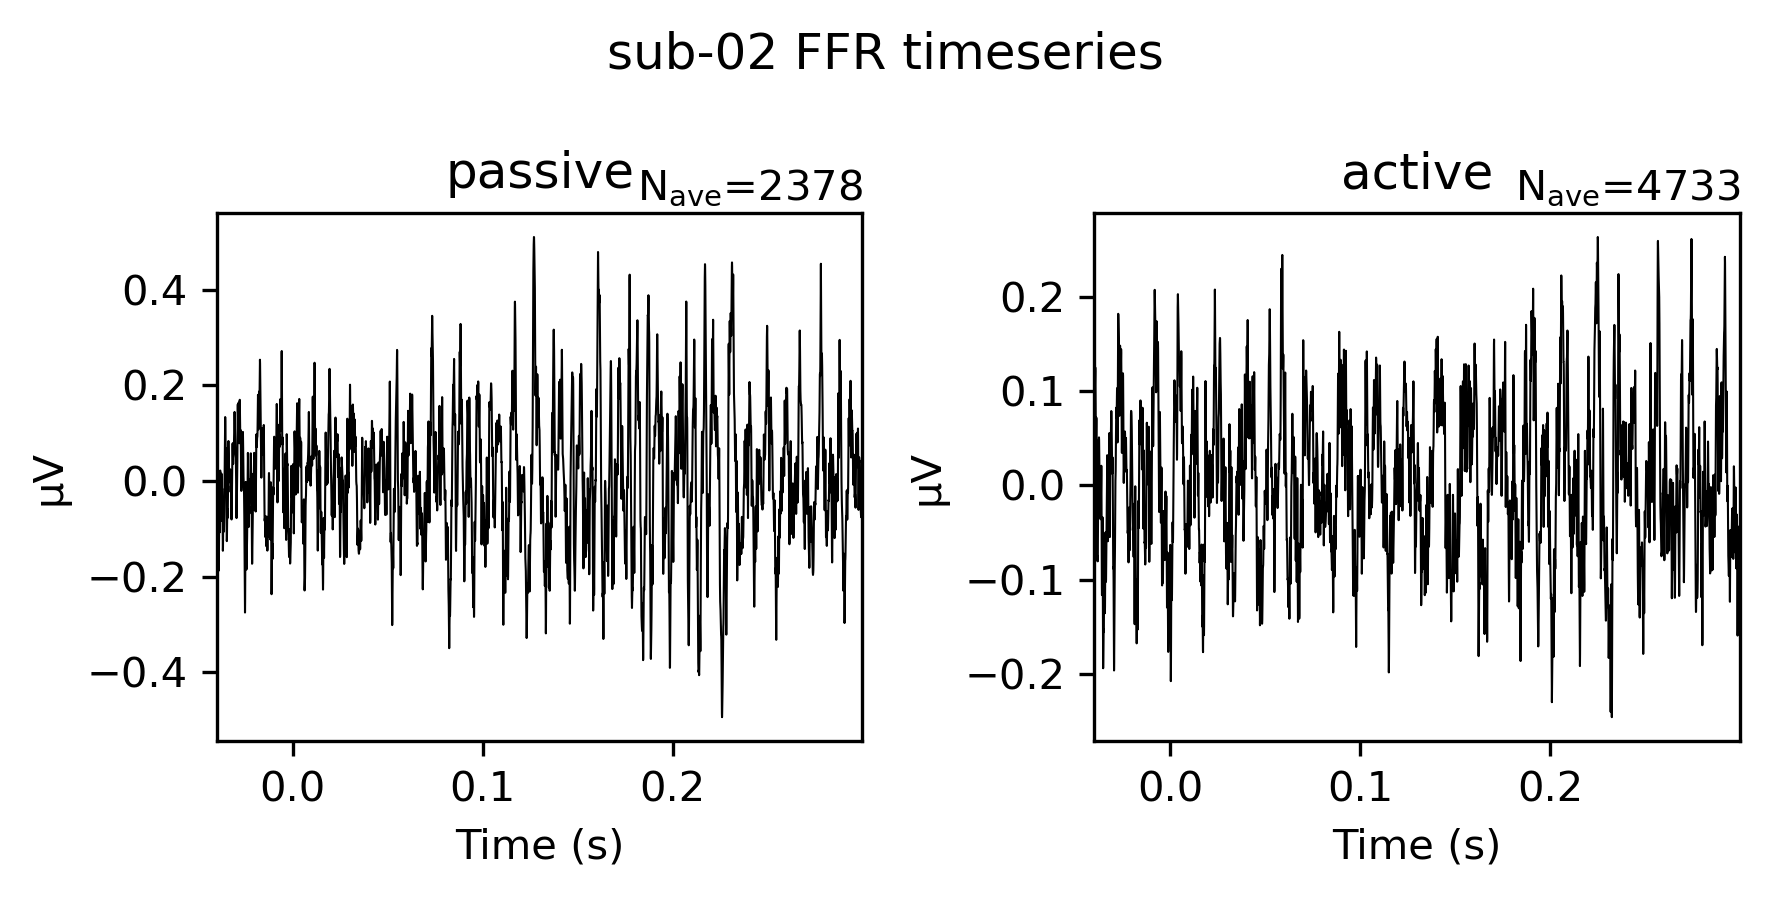

<Figure size 640x480 with 0 Axes>

In [39]:
# Waveforms
fig, ax = plt.subplots(1, 2, figsize=(6,3), dpi=300)
task_evoked_dict['passive'].plot(axes=ax[0], selectable=False, show=False)
task_evoked_dict['active'].plot(axes=ax[1], selectable=False, show=False)

ax[0].set_title('passive');
ax[1].set_title('active');

fig.suptitle(f'sub-{sub_label} FFR timeseries')

fig.tight_layout()
plt.show()
plt.savefig(f'sub-{sub_label}_timeseries.svg')

    Using multitaper spectrum estimation with 7 DPSS windows


    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).


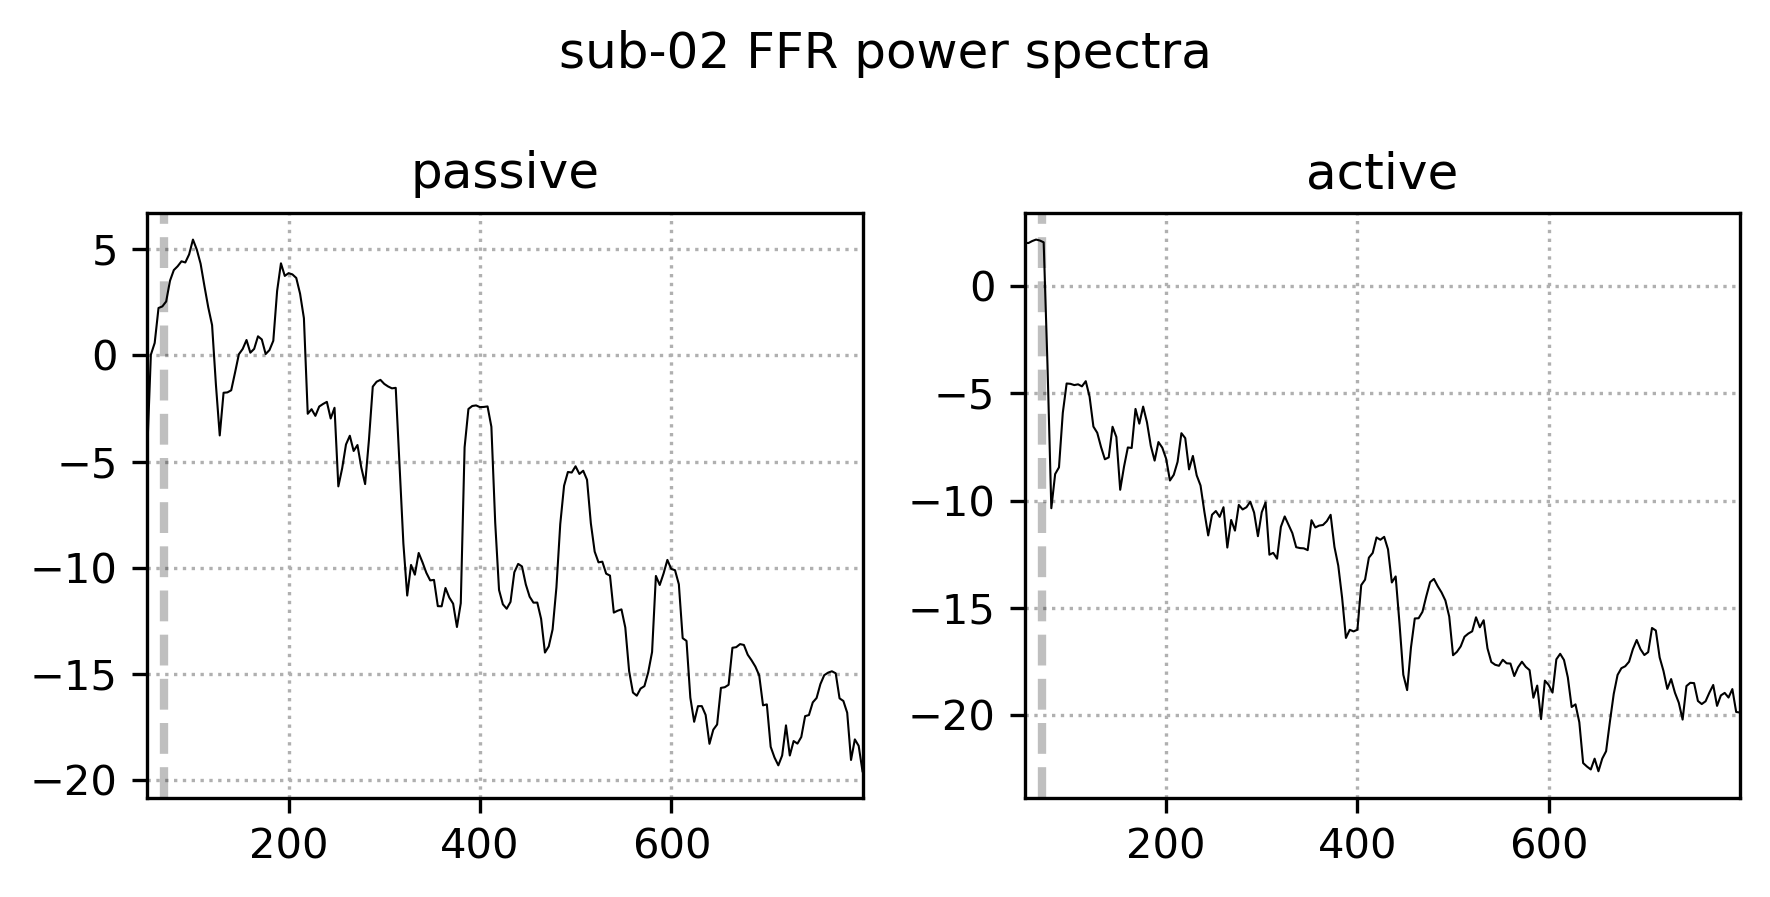

<Figure size 640x480 with 0 Axes>

In [38]:
# Power spectra
passive_psd = task_evoked_dict['passive'].compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)
active_psd = task_evoked_dict['active'].compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)
fig, ax = plt.subplots(1, 2, figsize=(6,3), dpi=300)
passive_psd.plot(axes=ax[0], amplitude=False, average=True, show=False)
active_psd.plot(axes=ax[1], amplitude=False, average=True, show=False)

ax[0].set_title('passive');
ax[1].set_title('active');

fig.suptitle(f'sub-{sub_label} FFR power spectra')

fig.tight_layout()
plt.show()
plt.savefig(f'sub-{sub_label}_spectra.svg')

No baseline correction applied
No baseline correction applied


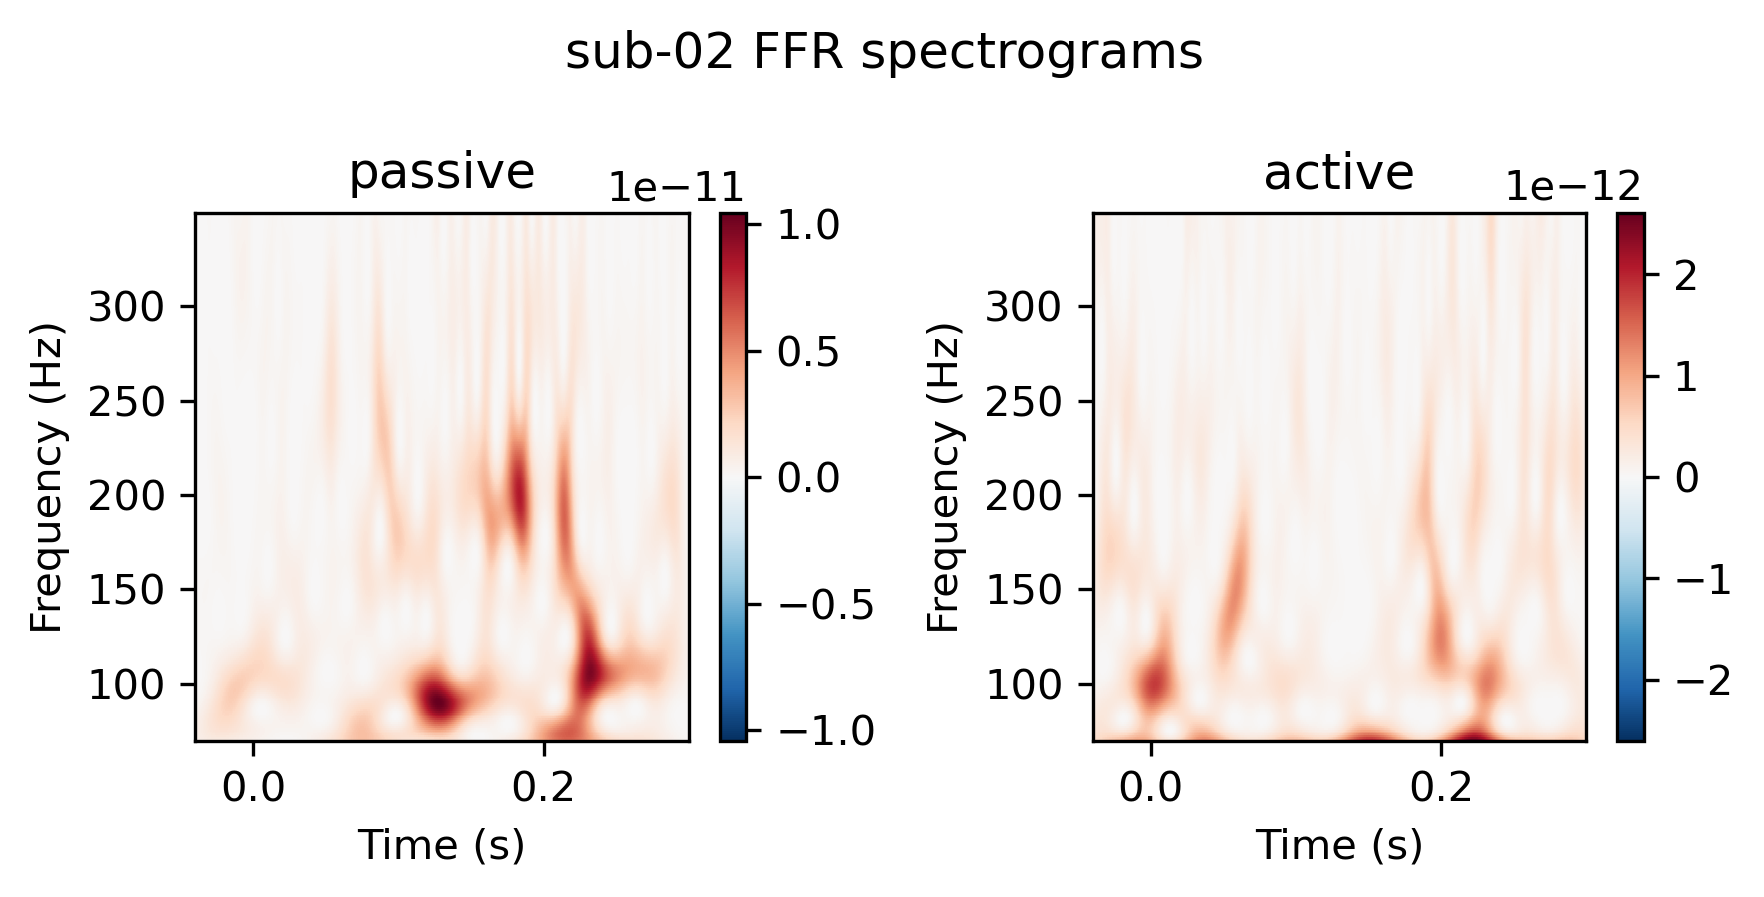

<Figure size 640x480 with 0 Axes>

In [37]:
# Spectrograms
frequencies = np.arange(70,350)
active_power =  task_evoked_dict['active'].compute_tfr("morlet", freqs=frequencies)
passive_power =  task_evoked_dict['passive'].compute_tfr("morlet", freqs=frequencies)
fig, ax = plt.subplots(1, 2, figsize=(6,3), dpi=300)
passive_power.plot(axes=ax[0], show=False)
active_power.plot(axes=ax[1], show=False)

ax[0].set_title('passive');
ax[1].set_title('active');

fig.suptitle(f'sub-{sub_label} FFR spectrograms')

fig.tight_layout()
plt.show()
plt.savefig(f'sub-{sub_label}_spectrograms.svg')

# QA and metrics

## RMS SNR

In [76]:
from numpy import mean, sqrt, square, arange

In [78]:
for sx, stim in enumerate(task_evoked_dict):
    s_evoked = task_evoked_dict[stim]
    baseline_ind_bounds = s_evoked.time_as_index(task_evoked_dict[stim].baseline)
    response_ind_bounds = s_evoked.time_as_index([0.05, 0.200])

    evoked_baseline = s_evoked.data[0,baseline_ind_bounds[0]:baseline_ind_bounds[1]]
    evoked_response = s_evoked.data[0,response_ind_bounds[0]:response_ind_bounds[1]]
    rms_baseline = sqrt(mean(square(evoked_baseline)))
    rms_response = sqrt(mean(square(evoked_response)))

    rms_snr = rms_response / rms_baseline

    print(f'{stim} RMS SNR: {rms_snr:.04f}')
print(f'\nMean RMS SNR: {rms_snr.mean():.04f}' )

active RMS SNR: 0.9412
passive RMS SNR: 1.5903
motor RMS SNR: 0.8907

Mean RMS SNR: 0.8907


## [IN PREP] Autocorrelation

In [42]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [43]:
acf, confint = sm.tsa.stattools.acf(all_evoked.data[0,:], 
                                    nlags=len(all_evoked.data[0,:])-1,
                                    alpha=.05)

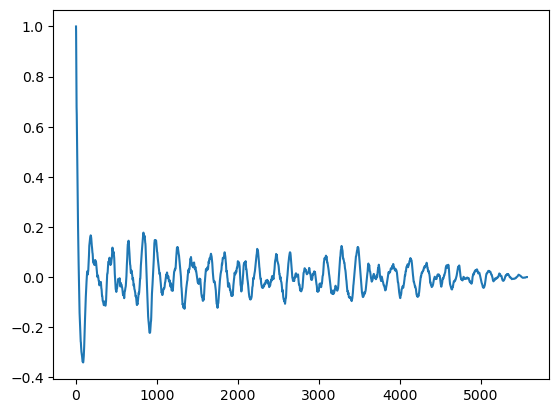

In [44]:
plt.plot(acf)
plt.show()

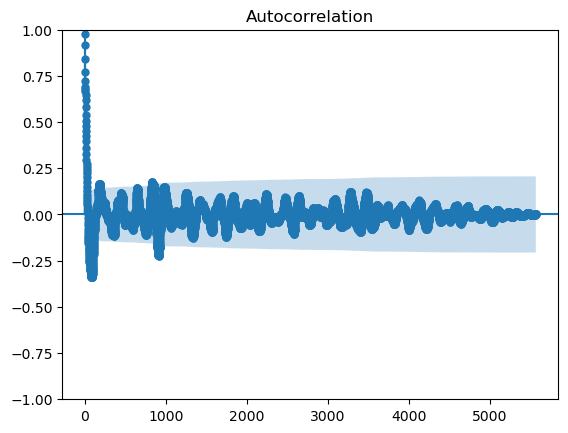

In [45]:
sm.graphics.tsa.plot_acf(all_evoked.data[0,:], 
                         lags=len(all_evoked.data[0,:])-1, 
                         zero=False,)

## [IN PREP] Stimulus–response correlations


In [46]:
data.pick(['Erg1'])

Measurement date,"July 18, 2024 13:12:19 GMT"
Experimenter,Unknown
Participant,
Digitized points,Not available
Good channels,1 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,16384.00 Hz
Highpass,0.00 Hz
Lowpass,3334.00 Hz


In [47]:
# epoch data based on stimulus events
stim_epochs = mne.Epochs(data_filtered, 
                    events, 
                    event_id=event_dict,
                    picks=['Erg1'],
                    tmin=-0.04, tmax=0.3, 
                    baseline=[-0.04, 0],
                    #reject = dict(eeg = 35e-6)).drop_bad()
                    reject=dict(eeg=75)).drop_bad()

Not setting metadata
1170 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1170 events and 5571 original time points ...
0 bad epochs dropped


In [48]:
stim_epochs

Number of events,1170
Events,button_press: 1170
Time range,-0.040 – 0.300 s
Baseline,-0.040 – 0.000 s


In [49]:
stim_epochs.average()

Condition,button_press
Data kind,average
Timepoints,5571 samples
Channels,1 channels
Number of averaged epochs,1170
Time range (secs),-0.03997802734375 – 0.29998779296875
Baseline (secs),-0.040 – 0.000 s


Need more than one channel to make topography for eeg. Disabling interactivity.


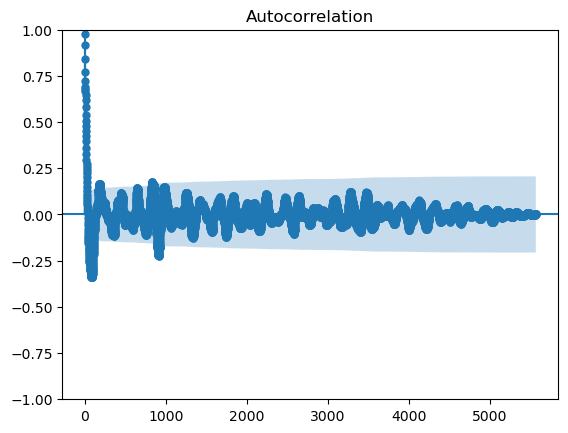

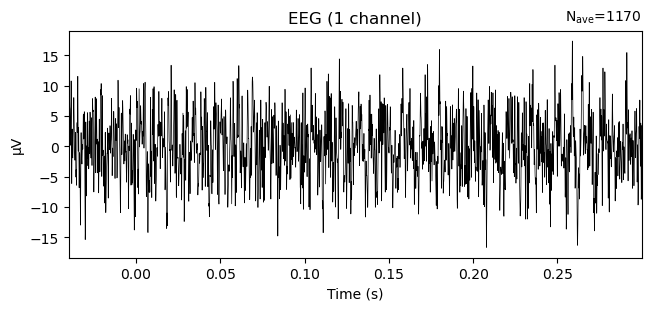

In [50]:
stim_epochs.average().plot();

In [51]:
stim_data = stim_epochs.average().get_data()[0,:]
active_data = task_evoked_dict['active'].get_data()[0,:]
passive_data = task_evoked_dict['passive'].get_data()[0,:]

In [78]:
np.array(range(len(stim_data)))

array([   0,    1,    2, ..., 5568, 5569, 5570])

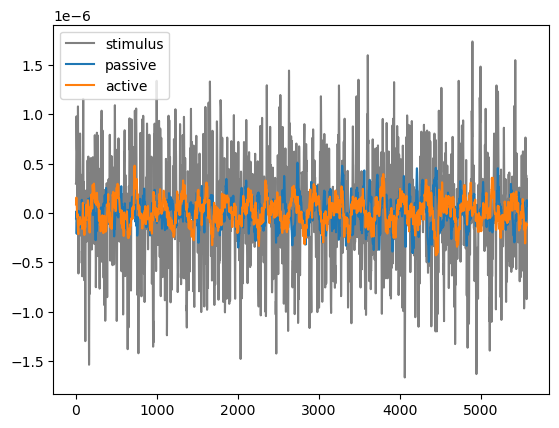

In [86]:
plt.plot(stim_data/10, color='grey')
plt.plot(passive_data)
plt.plot(active_data)
plt.legend(['stimulus','passive','active'])
#plt.xaxis(np.array(range(len(stim_data)))/16384)
plt.show()

In [52]:
from scipy.stats import spearmanr
active_res = spearmanr(active_data, stim_data, alternative='greater')
passive_res = spearmanr(passive_data, stim_data, alternative='greater')


In [53]:
active_res

SignificanceResult(statistic=0.013488523482214512, pvalue=0.15706554806619186)

In [54]:
passive_res

SignificanceResult(statistic=-0.0022353155565718644, pvalue=0.5662381718955769)